In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import env

# Acquire and Summarize

1) Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

***Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for ```airconditioningtypeid```***. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the ```.duplicated``` method) - Only include properties that have a latitude and longitude value.

In [2]:
z = env.get_db_url('zillow')

In [10]:
zillow = pd.read_sql('''SELECT * 
	FROM predictions_2017
	LEFT JOIN properties_2017 USING(parcelid)
    LEFT JOIN airconditioningtype USING(airconditioningtypeid)
    LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
    LEFT JOIN buildingclasstype USING(buildingclasstypeid)
    LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
    LEFT JOIN propertylandusetype USING(propertylandusetypeid)
	LEFT JOIN storytype USING(storytypeid)
    LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
    WHERE YEAR(transactiondate) = 2017
    AND latitude IS NOT NULL
    AND longitude IS NOT NULL;''', z)

zillow.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,None,NaN,6.037124e+13,Central,None,None,Central,Condominium,None,None


In [11]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77579 entries, 0 to 77578
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        223 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77579 non-null  float64
 3   heatingorsystemtypeid         49571 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   parcelid                      77579 non-null  int64  
 8   id                            77579 non-null  int64  
 9   logerror                      77579 non-null  float64
 10  transactiondate               77579 non-null  object 
 11  id                            77579 non-null  int64  
 12  basementsqft                  50 non-null     float64
 13  b

In [12]:
zillow.to_csv('zillow.csv')

In [5]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77614.0,1.300781e+07,3.518694e+06,1.071186e+07,1.153821e+07,1.253006e+07,1.421100e+07,1.676893e+08
id,77614.0,3.880650e+04,2.240538e+04,0.000000e+00,1.940325e+04,3.880650e+04,5.820975e+04,7.761300e+04
logerror,77614.0,1.675218e-02,1.708879e-01,-4.655420e+00,-2.432860e-02,6.669808e-03,3.929424e-02,5.262999e+00
id,77614.0,1.496056e+06,8.613448e+05,3.490000e+02,7.525952e+05,1.499186e+06,2.242084e+06,2.985182e+06
airconditioningtypeid,25007.0,1.812013e+00,2.965768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,207.0,7.386473e+00,2.728030e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77580.0,2.298492e+00,9.967259e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77580.0,3.053222e+00,1.140472e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00


In [13]:
zillow = zillow.sort_values(by='transactiondate', ascending=False).drop_duplicates(subset=['parcelid'])

2) Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [19]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
id,77381.0,3.884789e+04,2.240216e+04,0.000000e+00,1.946000e+04,3.886900e+04,5.825200e+04,7.761200e+04
logerror,77381.0,1.662499e-02,1.701908e-01,-4.655420e+00,-2.437679e-02,6.626972e-03,3.920313e-02,5.262999e+00


In [21]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 77578 to 0
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   id                            77381 non-null  int64  
 9   logerror                      77381 non-null  float64
 10  transactiondate               77381 non-null  object 
 11  id                            77381 non-null  int64  
 12  basementsqft                  50 non-null     float64
 13  b

In [22]:
zillow.dtypes

typeconstructiontypeid    float64
storytypeid               float64
propertylandusetypeid     float64
heatingorsystemtypeid     float64
buildingclasstypeid       float64
                           ...   
buildingclassdesc          object
heatingorsystemdesc        object
propertylandusedesc        object
storydesc                  object
typeconstructiondesc       object
Length: 69, dtype: object

In [23]:
zillow.shape

(77381, 69)

In [28]:
zillow.select_dtypes(include='number').columns != 

Index(['typeconstructiontypeid', 'storytypeid', 'propertylandusetypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'parcelid', 'id',
       'logerror', 'id', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'num

In [33]:
zillow.select_dtypes(include='number').columns.str.contains('typeid')

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

77578         NaN
77577         NaN
77576         NaN
77575     27328.0
77574     32368.0
           ...   
5             NaN
4        268548.0
3             NaN
2             NaN
0             NaN
Name: regionidneighborhood, Length: 77381, dtype: float64

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
77578,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12826780,77612,0.007204,...,None,NaN,6.037503e+13,None,None,None,Central,Single Family Residential,None,None
77577,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,77611,0.037129,...,None,NaN,6.037434e+13,Central,None,None,Central,Single Family Residential,None,None
77576,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,77610,0.013209,...,None,NaN,6.111008e+13,None,None,None,None,Single Family Residential,None,None
77575,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,77609,0.020615,...,None,NaN,6.037101e+13,None,None,None,Central,Single Family Residential,None,None
77574,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10833991,77608,-0.002245,...,None,NaN,6.037132e+13,Central,None,None,Central,Condominium,None,None


0 logerror
1 basementsqft
2 bathroomcnt
3 bedroomcnt
4 calculatedbathnbr
5 finishedfloor1squarefeet
6 calculatedfinishedsquarefeet
7 finishedsquarefeet12
8 finishedsquarefeet13
9 finishedsquarefeet15
10 finishedsquarefeet50
11 finishedsquarefeet6
12 fips
13 fireplacecnt
14 fullbathcnt
15 garagecarcnt
16 garagetotalsqft
17 hashottuborspa
18 latitude
19 longitude
20 lotsizesquarefeet
21 poolcnt
22 poolsizesum
23 rawcensustractandblock
24 roomcnt
25 threequarterbathnbr
26 unitcnt
27 yardbuildingsqft17
28 yardbuildingsqft26
29 yearbuilt
30 numberofstories
31 fireplaceflag
32 structuretaxvaluedollarcnt
33 taxvaluedollarcnt
34 assessmentyear
35 landtaxvaluedollarcnt
36 taxamount
37 taxdelinquencyyear
38 censustractandblock


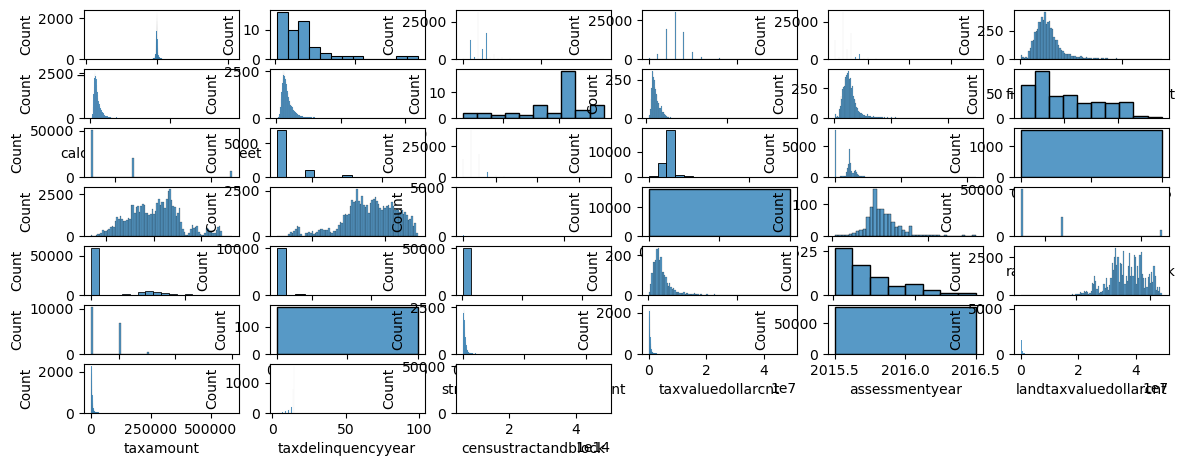

In [66]:
plt.figure(figsize=(14,6))

for i, col in enumerate(zillow.select_dtypes(include='number').columns[~zillow.select_dtypes(include='number').columns.str.contains('id')]):
    print(i, col)
    plt.subplot(8,6,i+1)
    sns.histplot(data=zillow, x=col)

plt.show()
    

,id,id
77578,77612,1187175
77577,77611,1843709
77576,77610,2968375
77575,77609,673515
77574,77608,2864704
...,...,...
5,5,1447245
4,4,1970746
3,3,2288172
2,2,11677


In [53]:
len(~zillow.select_dtypes(include='number').columns.str.contains('typeid'))

58

In [57]:
zillow.select_dtypes(include='number').columns[~zillow.select_dtypes(include='number').columns.str.contains('typeid')]

Index(['parcelid', 'id', 'logerror', 'id', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyyear', 'censustractandblock'],
      dtype='object')

In [42]:
for col in zillow.select_dtypes(include='object'):
    print(zillow[col].value_counts())

2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-07-09       1
2017-08-12       1
2017-08-06       1
2017-08-05       1
2017-09-25       1
Name: transactiondate, Length: 264, dtype: int64
0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
012D        1
0114        1
020E        1
020G        1
0203        1
Name: propertycountylandusecode, Length: 75, dtype: int64
LAR1          6747
LAR3          2437
LARS          1389
LBR1N         1222
LARD1.5       1127
              ... 
LFR130000*       1
WCRA20000*       1
RPRS8000-O       1
GAC3             1
BGA1*            1
Name: propertyzoningdesc, Length: 1907, dtype: int64
Y    2886
Name: taxdelinquencyflag, dtype: int64
Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64
Contemporary     172
Conventional      19
Ranch/Rambler      7
B

3) Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [122]:
zillow = zillow.drop(columns='id')

In [126]:
df = pd.DataFrame({})

for col in zillow:
    num_missing = zillow[col].isnull().sum()
    pct_rows_missing = num_missing/len(zillow[col])
    ls.append([num_missing, pct_rows_missing])
    df_nulls = pd.DataFrame(data={'num_rows_missing': [num_missing],
                      'pct_rows_missing': [pct_rows_missing]},
                           index=[col])
    df = pd.concat([df,df_nulls])

df.sort_values(by='pct_rows_missing', ascending=False)

,num_rows_missing,pct_rows_missing
buildingclassdesc,77366,0.999806
buildingclasstypeid,77366,0.999806
finishedsquarefeet13,77340,0.999470
storydesc,77331,0.999354
storytypeid,77331,0.999354
...,...,...
longitude,0,0.000000
latitude,0,0.000000
fips,0,0.000000
bathroomcnt,0,0.000000


In [77]:
num_missing = zillow.airconditioningtypeid.isnull().sum()
pct_rows_missing = num_missing/len(zillow.airconditioningtypeid)
df_nulls = pd.DataFrame(data={'num_rows_missing': [num_missing],
                      'pct_rows_missing': [pct_rows_missing]},
                           index=['airconditioningtypeid'])

df_nulls

,num_rows_missing,pct_rows_missing
airconditioningtypeid,52428,0.677531


# Prepare

1) Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [127]:
zillow.propertylandusedesc.value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [ ]:
'Single Family Residential', 'Condominium', 'Mobile Home', 'Manufactured, Modular, Prefabricated Homes', 'Residential General', 'Townhouse'

2) Create a function that will drop rows or columns based on the percent of values that are missing: ```handle_missing_values(df, prop_required_column, prop_required_row)```.

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [ ]:
col_pct_missing = (col.isnull().sum()) / len(col)
row_pct_missing = (df.loc[i].isnull().sum()) / 

In [142]:
for i in zillow.index:
    
    print(zillow.loc[i].isnull().sum())

34
32
32
33
29
34
33
29
31
33
32
32
34
32
30
31
34
35
32
31
31
32
34
30
31
34
32
33
31
33
32
31
34
29
34
31
32
29
32
31
33
31
33
31
31
34
34
33
34
33
34
32
33
31
34
34
34
31
30
33
33
32
29
29
34
31
32
31
33
32
34
32
31
34
33
34
34
29
36
32
35
32
34
33
33
34
36
33
34
32
33
31
34
33
31
32
34
34
29
30
32
32
34
31
33
32
34
33
34
30
31
32
33
34
31
32
32
30
34
33
32
31
33
29
29
32
32
32
32
29
34
29
34
34
32
32
34
32
29
36
34
34
31
29
33
32
31
34
34
32
33
30
29
30
32
31
34
35
32
29
32
33
32
32
29
31
29
34
34
36
32
34
32
31
34
32
37
33
34
34
31
34
40
31
31
29
32
35
34
34
29
31
34
34
30
32
34
34
34
31
32
34
33
33
31
30
31
34
31
33
31
34
32
33
29
33
30
32
33
33
33
33
34
35
31
32
35
33
29
33
33
33
34
33
31
33
30
34
32
32
33
34
33
32
31
33
35
33
33
34
33
35
34
31
34
30
34
30
34
36
34
31
34
34
33
33
33
33
32
29
32
34
31
33
34
27
31
34
34
29
32
32
34
33
29
30
33
35
32
32
29
34
34
34
31
33
32
34
35
31
34
33
33
29
33
33
31
31
29
32
31
30
34
31
34
34
33
34
33
33
31
32
34
34
32
31
35
31
34
32
35
32
30
3

34
34
35
34
31
31
33
32
31
36
31
33
36
33
32
33
35
37
31
37
29
29
30
31
32
35
32
33
33
34
37
37
31
33
32
31
34
30
32
37
37
32
32
32
33
30
31
33
33
31
34
32
32
36
31
33
30
27
31
33
33
32
30
32
32
33
34
32
27
31
30
36
34
29
34
31
33
33
32
32
30
35
27
32
34
32
33
34
37
31
33
38
35
35
34
35
31
36
35
32
33
33
40
31
33
36
34
33
32
31
32
32
32
35
31
34
33
34
31
30
30
36
31
33
31
33
37
36
31
33
37
32
34
32
34
32
32
30
33
33
31
32
32
32
38
37
35
32
38
33
34
33
31
34
34
35
34
32
29
32
34
35
35
36
31
31
38
32
37
36
33
33
33
35
35
32
33
33
29
34
30
31
30
35
32
40
34
35
31
31
32
32
32
33
30
36
36
34
33
29
32
36
33
37
33
32
31
32
31
30
35
33
31
32
38
30
34
31
38
34
35
31
32
33
31
31
29
27
34
33
33
37
34
38
31
32
36
30
33
33
37
31
35
37
30
31
36
34
29
31
29
29
34
31
31
34
35
29
31
33
32
37
33
31
35
33
35
35
35
32
32
33
34
34
33
33
33
29
32
33
29
31
33
36
34
34
32
31
31
33
34
37
32
33
32
28
37
31
34
37
31
36
32
33
34
34
30
45
29
34
31
34
32
34
33
32
37
32
37
32
33
36
29
33
34
32
34
34
29
32
36
29
32
3

35
33
31
32
34
29
35
34
33
33
32
36
34
30
37
32
29
38
32
31
34
37
30
28
38
34
34
34
31
38
31
29
32
38
35
30
30
32
36
32
39
32
33
32
33
34
36
37
33
34
34
31
32
34
30
34
32
33
35
33
32
32
29
33
34
34
31
33
29
34
35
34
33
27
33
36
29
32
34
32
33
30
30
33
30
34
33
32
36
29
33
36
32
31
32
32
33
32
32
31
35
29
33
34
34
33
32
32
31
32
34
35
33
36
29
32
34
32
33
29
38
32
30
33
35
36
33
33
29
38
34
34
34
37
31
32
31
34
32
33
40
37
33
33
30
35
35
34
32
32
34
36
33
33
33
33
34
31
33
33
33
37
33
27
32
29
29
32
35
37
29
33
32
33
34
29
32
32
34
30
31
29
32
32
39
34
36
32
32
29
30
34
29
33
29
31
36
32
34
33
33
33
33
31
30
36
33
32
35
31
29
31
34
29
33
33
31
29
34
31
29
31
31
28
31
45
31
33
33
36
36
31
37
38
33
33
34
33
36
34
35
30
33
33
30
32
32
33
33
33
29
32
30
37
38
37
36
36
34
31
33
31
37
31
29
35
33
30
34
34
29
34
31
34
31
33
34
34
33
34
29
34
32
34
31
32
29
33
31
31
36
30
30
35
31
33
31
32
32
33
36
36
33
36
36
29
31
36
32
36
32
38
34
34
34
33
32
28
31
34
31
30
33
34
33
34
34
32
32
32
36
31
31
2

32
30
29
35
31
31
33
33
34
31
29
30
32
33
38
37
30
33
37
36
36
34
32
36
32
36
35
33
34
34
34
35
31
32
35
37
31
31
37
36
29
36
29
32
32
30
32
31
31
32
35
27
36
32
36
30
40
29
34
33
36
31
37
32
31
31
30
32
33
29
32
34
35
36
34
34
34
33
31
31
36
34
32
36
34
32
35
36
31
33
27
29
36
34
37
32
37
37
34
37
35
35
30
33
34
34
37
34
34
32
34
32
34
32
33
36
34
36
35
32
30
33
37
31
34
37
36
29
33
29
37
31
34
33
32
33
34
32
33
29
29
36
30
35
31
31
34
31
37
33
36
36
36
37
32
32
34
38
31
35
32
36
30
32
37
34
30
34
29
28
37
38
33
33
34
33
33
31
38
37
32
38
34
32
32
32
35
33
38
29
31
38
33
35
31
37
33
34
32
34
33
33
33
36
38
36
33
38
32
31
38
32
31
32
34
34
38
33
33
31
34
30
35
33
31
38
37
31
33
35
33
32
31
38
34
35
37
32
32
32
34
36
36
34
30
32
38
33
33
32
31
34
33
32
39
35
36
31
32
33
31
31
33
33
31
31
33
32
35
29
29
32
31
33
32
33
35
32
32
34
31
32
34
29
31
36
32
35
33
36
36
35
35
29
33
32
31
33
34
32
35
38
35
36
35
33
35
33
33
31
33
32
32
32
32
32
32
31
33
34
33
37
34
32
38
32
33
30
32
30
38
36
29
3

33
31
32
36
31
33
29
32
33
30
36
32
32
32
34
29
32
37
32
31
32
31
30
34
32
30
35
32
36
37
38
32
33
33
31
32
33
30
33
35
33
33
30
33
33
34
29
32
32
34
34
31
34
33
30
33
34
33
31
35
31
34
32
37
33
32
34
36
32
32
34
29
34
34
34
31
33
34
30
34
32
34
31
33
31
32
31
32
32
26
32
32
33
32
34
34
30
31
36
32
37
33
29
37
34
33
32
32
35
37
34
31
33
36
31
35
38
32
37
32
32
32
33
35
29
29
32
32
33
33
37
32
33
29
29
34
34
32
38
36
33
38
33
37
30
31
30
34
35
32
31
31
36
30
32
33
31
34
33
37
31
35
30
32
34
29
34
32
32
34
34
38
33
33
33
35
31
34
33
29
33
36
32
33
34
30
34
32
36
34
32
32
31
36
31
33
33
32
34
28
34
31
32
30
31
36
35
37
35
34
36
31
33
33
31
33
32
36
32
33
31
31
33
33
32
32
29
33
32
32
32
36
30
33
34
32
31
34
34
29
38
36
32
34
38
34
38
32
29
33
31
32
32
38
29
32
34
33
37
29
29
34
32
30
30
34
37
32
32
32
33
30
33
31
31
34
37
36
34
37
34
38
32
33
34
36
29
33
30
36
35
29
29
31
33
33
28
36
36
36
36
34
34
32
33
32
35
37
36
30
29
37
29
32
31
29
31
35
36
33
35
31
33
32
34
30
34
29
31
35
32
33
31
3

33
33
36
33
33
33
31
35
31
34
34
39
30
33
33
29
30
29
33
31
32
31
34
32
33
32
37
36
33
29
32
31
33
30
33
32
38
33
29
36
35
31
33
29
32
38
38
30
32
29
31
33
34
33
30
34
36
32
36
32
30
32
33
29
34
31
31
35
32
31
33
32
34
31
38
36
33
34
35
31
32
34
33
33
32
38
34
36
32
32
33
32
31
33
33
33
36
32
31
30
27
29
33
31
29
36
39
33
33
33
27
34
33
33
32
29
35
29
36
29
31
29
33
29
32
35
32
34
31
36
32
36
35
29
30
31
33
36
34
31
32
35
30
34
32
36
34
34
36
33
37
34
33
33
33
29
37
31
34
35
33
30
30
34
32
34
33
31
38
31
34
35
35
35
31
32
31
33
32
31
31
34
34
31
31
33
35
36
32
33
31
30
31
34
34
31
34
32
35
31
36
33
33
33
34
34
31
30
35
33
34
28
35
32
31
32
33
32
31
35
36
33
31
33
32
33
32
33
29
36
31
34
32
37
31
33
33
33
37
31
32
32
34
32
31
29
35
27
30
29
32
34
38
29
34
33
34
33
32
32
34
32
33
31
32
33
37
32
32
34
32
33
31
30
32
35
29
34
32
34
33
32
32
34
32
32
34
33
29
33
32
32
34
32
31
34
31
32
34
35
33
37
34
33
31
34
34
29
30
34
29
32
32
35
34
29
32
33
34
36
29
33
30
34
32
29
32
33
33
34
38
33
34
3

35
39
31
32
30
29
40
34
34
34
32
30
33
37
33
29
30
32
34
37
29
34
29
34
33
35
31
34
31
31
32
34
32
37
32
32
34
31
34
33
29
32
32
34
33
33
29
32
32
35
33
37
30
36
33
33
34
32
33
32
34
30
29
34
31
32
33
35
35
30
34
35
31
31
36
29
34
28
37
33
37
34
34
34
31
32
32
34
32
35
34
33
32
44
35
29
32
31
30
37
32
34
33
33
36
33
33
34
31
33
29
29
29
33
35
30
34
32
35
35
33
29
36
34
33
34
38
31
27
31
30
35
36
33
34
37
34
29
36
31
33
34
33
34
29
32
33
33
31
33
30
44
33
34
32
33
33
36
33
35
34
27
36
33
30
33
33
32
34
33
35
31
29
34
34
35
30
31
33
34
33
32
31
34
31
32
33
33
34
34
32
33
36
31
37
31
31
31
31
34
33
32
34
36
33
38
33
30
33
32
38
34
33
34
34
31
35
36
36
32
34
35
31
34
31
33
31
34
32
34
37
37
36
33
29
38
29
38
36
31
32
30
31
34
32
33
34
32
36
31
34
33
35
31
35
37
37
33
33
28
36
29
34
29
38
34
32
29
32
32
33
33
36
33
32
34
34
35
37
35
31
33
37
32
36
31
31
34
34
31
35
31
32
38
32
34
31
37
32
24
36
34
34
34
34
37
32
36
29
29
31
34
35
33
33
32
34
33
38
32
38
34
29
35
33
35
36
32
35
31
32
29
34
3

32
36
30
32
32
37
32
33
33
37
29
33
36
39
34
30
37
36
30
31
31
38
36
33
37
31
35
31
32
34
37
31
36
31
36
33
29
32
31
34
35
31
31
29
34
32
32
32
33
32
33
38
37
31
36
33
33
37
35
34
33
32
34
35
36
33
32
29
32
33
36
34
34
32
31
32
33
30
30
30
31
35
37
32
33
32
33
33
32
32
34
30
32
31
37
34
30
32
29
26
37
37
34
34
36
35
38
38
33
29
31
32
34
33
30
31
34
31
34
33
31
33
37
33
31
33
38
31
34
33
34
29
37
29
31
34
29
34
32
31
34
33
37
31
34
34
35
30
34
29
32
29
34
29
32
34
33
32
32
36
28
30
33
33
32
35
36
37
31
37
31
34
31
33
34
33
32
37
34
35
37
37
33
33
37
34
32
29
34
34
36
33
33
38
33
35
34
33
32
30
32
36
35
31
30
33
34
35
31
36
34
28
33
34
35
31
33
34
38
34
32
35
31
34
30
32
33
36
32
33
33
31
31
31
32
38
33
29
33
32
31
37
29
33
34
33
29
33
30
34
30
34
34
31
34
34
33
31
34
34
30
30
34
36
36
35
29
38
29
32
29
36
33
35
30
32
29
33
33
32
29
29
34
33
31
35
34
31
33
34
36
31
30
31
33
36
31
29
33
32
33
33
33
33
30
32
35
32
31
33
32
33
32
34
32
33
32
34
29
33
36
34
36
32
34
32
30
31
32
35
34
29
34
3

31
34
35
35
31
33
39
31
36
32
34
36
31
35
32
33
32
33
33
34
33
34
38
38
29
31
38
32
31
36
34
32
32
38
32
33
34
31
33
32
38
31
37
31
34
33
31
32
34
36
32
38
37
31
36
33
34
33
33
37
40
31
34
33
35
31
32
33
33
35
32
29
29
32
31
35
34
32
34
31
33
30
33
38
34
36
29
35
27
36
38
35
33
33
31
33
37
34
31
32
33
32
34
33
32
33
38
37
31
36
34
37
37
32
32
30
32
29
31
32
33
31
38
32
32
34
29
31
29
32
31
36
31
38
29
36
32
38
31
39
29
38
30
33
28
38
36
30
40
33
37
33
32
40
36
34
30
32
34
34
32
35
33
39
35
31
34
32
35
34
31
35
32
29
34
33
39
37
32
36
29
32
34
35
29
31
35
31
33
34
31
32
33
38
34
31
31
33
36
29
33
36
30
32
32
36
32
36
32
38
33
32
33
36
34
31
32
33
32
36
36
31
29
33
35
33
31
31
32
31
30
36
29
33
29
33
31
32
33
31
34
33
29
32
33
33
35
37
33
33
29
33
34
34
32
36
32
34
33
32
34
33
39
34
33
31
31
32
36
34
33
34
29
29
34
32
32
33
35
32
34
37
34
32
34
33
32
33
34
33
34
30
31
34
31
31
37
31
29
30
37
34
30
31
32
31
37
32
33
33
31
33
34
34
34
33
32
36
31
33
34
34
39
29
33
35
32
35
30
29
31
32
33
3

33
34
34
36
30
36
35
36
33
32
33
34
37
36
33
34
33
33
33
34
34
33
37
30
31
34
31
30
31
34
33
31
32
35
32
31
30
34
31
34
33
33
35
30
31
40
34
33
37
32
30
29
33
34
34
32
38
34
31
34
34
29
29
33
33
32
33
33
30
30
39
32
32
33
33
30
30
34
36
30
34
33
33
31
37
30
31
33
35
33
32
37
36
34
37
33
29
32
36
29
30
35
31
33
34
32
31
34
31
34
31
32
35
38
37
34
29
32
33
37
34
29
34
33
31
30
34
31
32
29
33
38
34
33
32
32
34
36
32
33
32
34
34
33
30
32
34
31
33
34
33
34
32
29
34
31
33
32
30
31
33
34
32
31
32
32
31
33
32
31
32
33
37
34
34
32
32
38
32
33
34
31
32
33
33
31
33
33
37
34
34
33
31
32
33
33
35
37
32
32
33
35
32
31
38
33
33
33
34
31
33
30
32
32
33
32
34
34
33
34
32
34
34
31
34
30
32
34
31
29
35
35
33
36
36
35
34
33
31
32
32
30
36
34
34
29
33
31
34
31
34
36
38
32
33
32
33
30
32
32
34
37
33
33
35
35
34
33
29
33
35
34
43
36
31
31
30
34
29
32
32
33
31
34
29
33
32
36
27
33
34
34
35
34
31
37
34
31
34
37
33
32
27
34
37
31
33
33
38
33
38
33
35
29
34
30
29
32
34
35
29
31
38
32
33
35
32
33
34
33
34
36
44
3

38
31
34
33
31
32
31
37
32
33
29
29
30
31
34
34
36
36
33
36
36
34
35
30
36
30
33
34
31
29
33
34
31
31
34
32
32
37
31
33
30
34
33
31
31
31
33
35
29
39
32
33
33
31
34
34
33
33
34
31
36
37
33
34
35
33
34
34
31
27
32
38
36
28
32
40
29
32
34
29
31
31
31
33
34
31
31
35
31
36
32
33
31
34
31
34
32
34
34
34
33
33
32
30
30
32
28
34
33
35
31
31
28
31
31
29
31
33
29
32
36
32
33
33
32
34
32
34
35
36
30
34
33
33
33
35
34
35
33
34
34
31
32
33
37
29
33
32
34
35
33
30
31
34
29
38
29
36
31
31
29
30
32
36
34
34
30
31
33
32
33
33
32
32
31
31
35
31
31
33
32
31
34
33
30
34
29
34
31
36
33
35
33
33
31
31
33
30
33
37
33
31
32
34
27
29
33
33
30
32
34
34
31
33
33
33
29
33
34
34
34
29
32
30
31
34
28
36
34
32
33
34
34
31
31
32
29
32
33
33
34
34
34
33
36
32
33
35
35
34
33
36
37
28
31
34
30
36
31
37
29
33
35
32
32
31
32
32
45
33
30
31
31
31
32
36
34
38
33
33
35
31
32
33
27
31
30
33
33
33
32
33
29
32
33
33
34
36
32
36
34
35
34
38
32
32
29
29
32
34
31
33
31
33
33
30
32
34
31
31
32
36
35
31
37
32
33
32
34
32
40
29
36
3

33
40
38
33
34
34
36
29
36
32
29
32
33
29
32
36
34
31
32
33
32
34
34
36
26
32
29
34
33
34
29
36
34
36
33
33
32
34
33
33
34
30
31
34
31
33
31
29
31
32
34
34
34
33
31
33
34
34
32
31
34
34
32
29
33
36
33
29
31
31
32
34
34
28
31
35
34
31
36
30
34
34
33
32
29
29
29
32
33
29
31
29
33
33
33
29
29
36
33
33
33
37
33
33
30
37
34
32
32
32
29
34
34
32
38
30
29
33
34
33
34
34
33
32
29
32
34
34
37
34
33
35
32
34
34
31
33
30
37
31
34
33
31
31
32
33
34
35
34
31
36
33
34
37
33
32
33
32
31
29
33
31
33
31
34
33
31
32
36
33
33
29
31
31
31
36
34
37
31
31
37
32
38
29
33
30
34
32
31
33
34
29
37
33
36
33
31
34
32
29
35
30
33
32
31
32
33
31
33
37
36
37
36
32
30
29
32
32
32
36
36
33
33
33
30
34
31
31
33
31
34
34
31
38
29
37
34
34
34
32
34
34
32
33
31
34
33
31
30
31
34
34
32
32
36
31
32
35
31
34
32
36
32
31
28
33
33
34
36
32
31
30
33
35
33
40
34
32
31
37
30
32
34
36
32
30
33
34
29
37
30
34
31
34
31
30
30
31
34
32
30
31
32
34
32
29
32
35
32
36
32
34
32
32
31
32
32
31
34
33
32
29
30
34
34
33
31
30
34
36
33
33
31
3

31
31
29
32
36
34
34
36
34
29
29
32
33
34
33
32
33
32
35
34
31
29
29
34
34
29
34
32
29
34
32
33
33
34
29
36
33
34
34
38
32
32
36
29
35
33
33
29
32
34
33
35
29
34
40
33
29
31
33
34
32
34
33
32
31
34
34
35
33
29
29
35
36
34
33
34
31
33
32
31
30
32
31
34
36
34
32
37
29
34
36
33
33
38
32
31
38
36
33
35
35
33
31
29
30
32
32
29
33
31
38
33
34
29
32
32
36
35
29
38
36
31
33
35
29
36
35
29
34
34
33
32
34
35
35
24
38
33
31
33
30
31
33
33
29
31
32
34
34
33
33
28
31
35
34
31
37
32
33
32
29
31
32
32
33
34
33
31
46
34
34
33
31
31
33
34
34
33
28
32
32
38
33
31
34
34
31
38
31
29
35
33
31
30
30
28
38
29
29
29
35
32
32
35
34
35
36
36
34
29
33
31
34
37
32
31
32
32
32
37
31
30
31
36
34
28
34
33
35
33
32
34
34
37
33
34
32
36
34
37
30
33
31
36
33
34
34
34
33
34
35
30
32
31
29
34
38
34
33
34
33
34
36
33
37
32
33
33
31
32
33
32
33
29
36
37
30
33
29
32
33
32
29
32
34
30
37
34
37
32
33
33
36
30
33
32
36
33
37
33
36
34
31
33
28
37
32
29
33
31
29
32
34
36
32
31
31
29
33
32
30
36
31
33
31
32
32
36
32
34
38
33
29
3

31
35
34
33
31
33
32
32
37
37
35
35
33
32
31
37
35
35
30
32
37
33
31
32
27
33
33
29
37
38
36
36
33
31
32
33
33
38
34
32
29
36
29
31
34
29
32
35
36
35
33
29
31
30
37
32
34
35
33
31
33
32
32
29
32
32
34
32
32
30
33
35
34
32
32
36
32
32
34
29
31
36
34
31
31
34
31
33
31
33
32
32
33
36
34
29
33
32
33
34
31
29
34
30
33
30
34
32
36
31
34
32
33
33
32
33
33
32
31
31
31
33
31
33
33
33
31
34
33
34
33
30
32
34
34
29
32
34
35
31
32
32
34
33
32
34
33
34
30
36
32
32
33
32
31
33
27
33
29
32
32
31
32
35
36
30
33
32
34
35
32
32
34
35
33
31
38
30
32
35
29
29
34
31
31
31
31
29
31
32
37
31
34
29
29
32
29
27
32
33
34
35
35
30
31
32
32
38
34
30
34
35
31
32
34
31
29
37
33
35
32
34
32
33
33
32
32
32
34
33
33
33
32
32
34
32
33
31
33
32
32
29
34
29
33
33
33
34
34
34
33
33
33
37
37
33
33
33
31
31
33
32
34
35
37
29
38
34
33
27
34
37
31
38
32
36
32
31
31
31
34
31
32
33
31
33
34
31
38
32
35
33
33
36
33
37
34
33
34
33
32
33
32
31
30
34
33
34
33
34
36
34
33
36
33
33
32
29
36
34
32
36
28
31
31
31
36
31
32
31
32
29
30
3

33
34
33
32
33
33
34
34
30
36
29
36
32
34
32
34
35
34
36
32
34
33
33
36
35
29
32
34
35
31
33
33
34
32
31
31
31
33
29
36
32
32
32
29
33
33
29
29
36
35
31
34
33
34
34
31
34
32
37
35
30
33
35
33
32
33
33
29
33
37
31
29
31
32
31
32
32
33
27
36
29
34
34
33
31
36
36
29
31
33
35
34
31
32
32
29
36
32
37
34
34
34
34
32
32
37
30
32
31
33
33
36
33
34
32
34
37
32
34
37
30
31
33
31
36
38
29
32
33
31
33
29
34
35
29
34
33
32
29
36
29
32
35
26
35
34
31
29
33
38
29
34
34
33
32
37
36
32
35
33
32
35
32
32
33
33
32
35
32
32
27
34
34
30
36
37
40
33
29
30
33
33
29
31
36
29
33
29
31
38
30
32
32
32
30
35
30
32
33
31
34
34
34
33
34
33
32
32
31
34
32
34
32
33
35
35
32
34
34
37
29
34
34
34
32
33
34
37
34
34
34
35
35
35
36
33
32
34
31
30
34
36
31
33
32
36
34
32
33
36
27
28
34
29
33
29
34
33
34
33
32
34
38
30
38
33
34
31
31
33
33
33
33
29
32
32
34
34
33
40
34
31
30
34
34
26
32
29
34
33
33
32
33
33
33
32
34
35
35
33
34
38
32
31
34
34
33
35
32
34
32
36
35
33
37
32
34
33
35
37
29
31
31
36
33
33
38
32
32
34
30
33
34
3

31
31
35
34
32
33
32
31
33
37
32
31
33
43
34
33
31
32
32
33
33
32
36
40
36
33
34
34
33
36
33
32
33
32
31
34
33
34
35
35
33
34
29
33
32
30
37
33
37
33
30
33
34
34
32
32
29
31
34
31
33
32
35
31
33
32
37
32
32
31
37
34
32
33
31
34
31
33
31
29
33
31
32
36
33
34
37
30
34
38
30
34
35
34
31
33
27
33
34
32
33
34
36
32
38
36
38
36
29
31
34
32
34
37
32
33
36
34
36
32
31
33
34
34
32
33
32
32
30
36
37
33
33
29
30
26
32
29
31
32
32
32
33
30
32
33
34
29
37
29
35
33
32
32
32
31
33
29
36
34
36
33
37
34
33
33
31
31
33
30
34
35
37
30
32
32
29
32
37
40
32
36
36
29
29
32
34
31
30
35
31
33
31
31
38
34
33
34
32
36
34
32
34
32
34
33
32
37
30
34
40
33
32
32
32
32
31
32
34
36
39
31
34
37
30
32
38
31
32
30
32
33
34
32
33
36
29
32
32
33
31
34
31
32
33
38
33
32
33
33
34
31
28
33
36
29
36
36
32
31
34
29
32
34
32
30
33
31
35
36
31
32
34
33
35
29
33
33
34
34
31
34
35
29
33
36
37
33
36
34
35
36
34
33
31
33
38
32
32
30
31
32
32
34
32
34
31
30
31
36
32
29
34
33
33
32
37
32
32
30
33
35
36
31
36
37
34
33
31
29
34
35
28
3

38
32
35
34
32
30
34
33
34
32
33
36
31
32
36
29
33
30
31
34
33
31
31
31
32
35
34
34
29
34
32
31
34
29
36
34
34
33
33
33
32
39
32
27
33
31
31
34
31
33
36
31
37
29
29
35
34
33
33
31
32
32
31
34
38
34
28
32
33
31
33
33
36
32
31
37
29
32
38
31
31
33
33
35
31
37
33
36
37
33
32
36
29
30
33
31
33
34
30
38
31
34
32
34
31
34
33
35
33
33
36
34
34
33
33
32
31
34
29
33
31
29
36
34
32
35
31
32
35
33
30
30
31
36
33
29
35
32
32
33
34
31
32
35
33
30
29
29
31
32
32
38
33
33
29
37
33
33
37
32
34
33
30
32
34
30
32
33
34
31
37
37
31
34
37
35
32
34
34
35
31
33
35
32
37
33
36
26
32
35
35
33
32
33
36
34
32
38
35
38
29
34
35
32
35
33
33
33
32
33
34
34
30
33
29
33
31
29
30
34
36
37
33
32
34
34
33
33
31
33
36
32
31
34
32
33
32
33
33
31
38
31
30
35
32
34
32
32
29
32
32
33
34
34
34
37
39
34
31
34
33
29
38
32
32
31
34
33
32
32
34
40
36
33
32
35
34
34
33
33
31
30
34
31
30
32
35
33
34
32
33
31
32
29
33
35
37
35
35
29
34
33
29
33
33
31
31
36
36
35
32
30
31
31
33
32
37
27
35
33
31
32
35
33
35
33
29
34
33
29
33
29
36
3

33
37
34
33
32
34
33
34
35
29
36
29
34
32
32
37
29
34
34
31
33
37
29
32
33
32
29
31
33
34
34
33
33
37
32
31
37
33
34
31
36
34
32
34
33
33
31
33
33
34
32
37
37
27
39
36
33
34
38
34
35
33
34
34
31
32
31
34
34
31
36
33
31
35
34
34
32
30
36
30
37
32
34
33
29
35
29
34
33
31
33
29
36
31
32
36
34
31
33
29
28
36
38
32
34
37
29
30
33
32
29
33
31
36
32
31
27
31
33
33
34
31
32
29
34
33
33
36
31
32
31
37
35
32
32
32
34
34
35
31
29
31
33
37
32
33
34
33
38
29
32
34
33
32
32
32
34
36
34
28
31
35
31
31
35
35
31
34
40
34
29
36
32
32
34
31
33
32
34
32
31
33
34
33
31
31
32
29
35
29
33
33
32
33
31
37
32
33
34
33
31
33
34
32
38
33
36
29
32
31
34
36
33
33
37
33
33
36
36
29
36
36
31
32
33
38
33
32
31
34
28
38
31
30
31
34
33
37
34
34
34
31
31
35
32
31
31
39
34
33
31
33
34
36
32
34
33
30
34
37
35
33
36
33
33
32
36
32
32
29
34
31
33
33
36
36
29
33
33
33
33
33
38
33
35
33
35
32
31
32
33
29
30
33
35
34
36
35
33
29
33
37
32
34
31
29
33
29
32
34
31
35
32
30
33
35
31
31
32
32
31
29
29
37
33
34
33
45
29
31
37
32
34
3

34
31
29
27
33
33
36
33
31
35
37
34
31
34
31
29
31
31
31
37
34
32
29
32
38
31
32
36
33
32
34
31
33
31
33
31
31
33
32
34
36
34
33
33
30
36
38
32
34
34
32
36
35
30
37
33
33
33
34
34
34
32
33
32
33
32
31
40
31
32
32
32
29
31
32
36
36
33
33
30
31
32
34
37
34
32
29
32
33
34
29
34
31
33
29
31
32
34
33
33
30
29
29
33
34
32
32
31
37
36
29
33
31
34
36
31
29
34
34
33
32
36
36
32
35
35
34
38
39
33
31
30
34
37
34
33
32
38
33
33
29
33
33
30
27
34
37
33
33
38
35
36
32
29
36
33
33
32
31
32
38
29
35
33
37
35
31
35
32
32
34
31
29
38
34
31
34
37
29
36
34
37
34
33
36
32
38
31
33
37
32
34
31
35
36
31
36
29
30
32
30
31
32
29
29
33
35
35
30
34
31
31
30
31
32
32
35
33
32
32
33
32
34
35
30
32
36
34
33
35
31
33
36
29
31
27
31
31
32
31
33
34
35
36
30
33
36
35
33
36
35
33
37
34
36
35
35
35
32
32
34
35
32
32
33
31
30
33
34
31
32
34
33
32
34
29
36
32
30
36
36
34
34
33
34
31
35
34
29
36
35
29
31
35
32
37
33
33
34
33
32
34
37
37
34
38
34
34
30
35
31
33
31
29
34
34
37
39
35
32
34
34
32
32
35
34
37
37
36
37
31
36
32
2

34
31
29
36
33
36
36
30
36
34
34
32
34
32
34
33
29
29
33
30
35
32
34
32
33
33
33
36
32
38
32
34
32
30
34
35
32
26
27
36
33
38
36
32
36
32
32
34
29
33
34
31
34
37
34
36
33
31
31
36
31
36
35
31
31
37
37
31
31
31
33
37
33
32
33
36
34
32
30
29
30
34
32
32
34
34
33
34
33
33
29
34
35
35
36
33
33
36
31
33
32
32
33
32
32
36
32
34
37
33
35
37
33
34
35
34
47
29
29
29
38
33
32
31
35
31
38
31
36
32
32
34
34
29
37
40
34
33
33
32
36
28
32
31
32
35
33
34
33
32
37
33
32
35
33
37
34
36
33
34
32
32
34
34
31
33
28
37
33
34
37
29
29
34
40
35
35
32
34
34
36
33
33
38
33
29
31
32
31
36
32
34
37
35
35
36
32
33
29
31
32
34
31
34
29
32
33
31
37
32
37
32
29
32
32
31
31
32
33
31
33
33
30
34
34
33
34
31
32
32
32
30
34
31
37
32
34
33
32
33
34
31
34
34
31
31
33
33
36
32
33
32
34
34
31
26
33
34
33
34
36
36
32
36
32
34
34
31
32
35
38
31
33
36
34
36
36
28
37
33
31
36
29
35
33
38
33
31
32
34
31
31
31
32
33
36
32
31
34
31
37
33
33
33
32
30
33
36
32
36
31
34
36
34
34
31
33
36
33
33
31
31
31
31
34
32
31
34
36
32
32
31
31
3

34
35
33
29
36
32
31
31
31
37
29
33
30
32
34
32
31
34
36
31
32
34
34
29
31
33
30
37
33
34
32
34
31
34
34
34
32
33
32
32
32
36
30
33
36
32
34
35
36
34
30
33
31
31
33
37
35
31
29
38
34
34
33
32
32
31
36
33
31
37
32
35
32
33
35
34
34
32
40
34
32
33
32
38
31
32
35
33
34
34
31
32
37
35
34
31
32
33
34
32
34
38
32
32
33
35
32
34
34
30
34
31
32
36
34
37
33
32
32
33
34
32
30
34
36
32
38
34
31
31
35
38
32
33
37
33
29
29
35
29
33
31
30
32
37
34
28
29
34
34
30
36
36
33
31
34
32
33
36
31
29
35
33
32
31
34
30
30
32
33
31
32
38
34
33
31
29
32
32
33
31
33
33
34
32
31
34
33
38
29
29
32
33
28
33
29
30
31
34
34
34
29
32
34
33
32
34
33
32
32
37
32
31
34
31
36
35
31
34
29
37
31
29
31
32
37
32
33
34
34
34
31
32
33
29
34
33
32
32
34
36
32
32
35
38
35
31
31
34
34
32
34
34
31
34
34
40
35
35
32
32
34
30
34
36
32
36
35
38
33
32
31
30
33
30
34
32
30
33
32
31
36
35
29
31
33
32
34
33
35
36
33
31
30
37
32
33
32
34
33
32
37
34
32
30
31
32
33
34
32
33
40
32
37
32
37
34
31
32
31
29
34
35
32
32
31
36
33
37
29
34
38
32
3

34
27
37
37
29
36
30
33
30
29
31
33
32
33
31
34
33
31
32
34
33
34
34
30
31
35
32
31
32
33
37
35
33
35
31
31
34
35
31
31
31
29
32
32
35
33
34
36
35
32
30
35
32
36
32
31
32
33
32
34
34
31
34
33
34
32
29
32
32
33
29
35
34
31
32
31
34
31
29
30
33
34
34
29
31
30
34
43
34
30
32
36
34
32
31
35
30
35
34
37
32
33
35
34
33
34
31
32
34
40
38
34
33
34
34
37
34
31
33
31
29
35
32
29
33
31
34
37
31
32
27
32
35
33
29
35
32
30
32
33
31
31
32
32
32
36
36
35
29
36
33
34
32
36
33
31
32
33
29
35
36
32
34
37
33
29
34
33
30
29
34
32
32
33
36
32
33
34
38
30
36
35
32
34
29
33
37
31
30
34
34
33
34
31
29
35
35
36
32
33
33
31
29
29
33
32
32
33
29
31
33
34
34
30
32
31
31
33
32
34
31
33
33
34
37
31
32
32
35
37
31
32
35
31
34
32
33
32
33
34
34
34
33
33
32
34
32
32
33
33
37
37
35
32
34
34
35
33
31
36
31
36
32
29
30
38
31
31
31
31
29
36
33
38
36
32
31
32
36
32
35
34
37
30
31
28
33
32
32
31
31
33
36
34
35
31
28
33
37
27
33
35
34
34
37
34
34
29
37
32
33
36
37
33
32
34
31
31
34
29
31
39
31
32
29
34
31
29
35
33
33
35
34
3

36
33
38
31
33
26
33
34
35
35
37
35
31
36
36
35
32
32
31
33
36
37
31
36
32
31
37
35
31
30
40
32
34
34
34
33
36
35
35
35
32
37
35
31
33
37
36
35
30
35
38
37
35
33
32
38
32
32
34
29
34
34
35
32
34
35
34
33
32
33
33
35
34
35
31
35
35
33
36
33
32
32
34
33
35
35
36
34
32
38
37
34
35
33
33
33
32
33
33
37
36
31
31
32
38
34
36
34
32
32
44
35
31
37
34
29
31
37
33
34
32
33
36
29
34
33
35
33
37
34
34
31
36
33
37
37
33
35
34
38
34
34
29
34
34
32
37
32
33
31
38
36
30
33
31
31
33
29
29
32
32
31
35
37
32
29
31
27
31
34
29
29
32
36
33
31
32
34
32
32
36
35
29
34
38
33
33
33
31
34
32
32
38
32
34
31
33
35
31
34
37
36
33
31
30
38
34
33
33
29
34
34
36
29
34
29
33
33
31
34
37
38
33
34
33
30
33
32
32
31
34
32
34
37
34
35
34
32
33
35
33
31
36
34
32
31
32
34
34
38
32
38
29
34
32
33
33
37
38
32
33
35
29
33
31
32
33
34
36
30
32
29
34
28
29
29
34
30
32
34
38
32
38
29
34
38
29
34
34
34
36
34
29
32
33
35
31
36
30
34
37
32
33
38
33
34
33
37
35
34
33
34
32
29
34
29
33
40
33
30
31
32
34
28
33
32
36
31
31
32
30
29
29
3

29
31
35
33
33
33
40
31
31
32
35
34
33
29
32
35
36
31
31
24
33
33
30
31
36
38
33
32
33
34
33
33
28
33
37
31
35
33
29
40
37
38
34
31
32
33
38
29
33
31
32
37
33
33
32
29
33
31
35
31
30
35
31
33
33
36
30
30
32
32
34
32
33
35
33
35
30
32
34
36
34
33
31
32
34
31
34
33
34
34
30
31
34
34
34
32
30
32
34
29
33
35
33
32
34
33
34
32
32
34
30
33
31
34
30
31
31
31
32
32
31
37
33
34
33
35
32
30
34
32
38
33
34
33
33
32
32
29
36
31
30
36
29
33
35
29
32
34
29
32
35
34
32
27
33
29
35
32
32
32
30
33
35
34
31
32
34
34
32
40
37
29
33
35
29
33
34
32
36
34
32
36
34
35
36
37
33
32
29
33
38
29
36
34
34
34
30
28
33
29
34
32
31
32
36
32
30
32
34
33
33
33
32
37
36
33
37
34
35
29
37
29
31
38
34
38
31
34
36
32
34
33
34
33
29
36
31
37
40
34
32
33
31
34
38
32
32
34
36
33
35
35
37
34
32
35
32
32
32
35
36
31
34
32
29
32
33
34
32
34
31
33
36
33
31
35
32
36
36
34
33
30
34
30
29
32
31
37
35
35
37
33
38
34
34
34
31
33
37
37
29
36
33
36
36
34
34
31
30
33
34
30
32
35
32
36
34
38
33
32
36
33
33
34
33
33
31
33
34
34
31
33
33
3

33
33
33
33
32
34
32
34
34
29
34
33
29
34
44
36
36
34
32
38
31
27
29
35
45
32
29
36
29
36
34
35
32
30
33
30
33
32
36
33
38
33
32
29
33
38
31
29
38
34
35
33
34
34
31
34
32
35
34
32
31
34
35
30
34
30
32
29
37
33
34
30
34
32
32
34
29
34
32
34
31
32
30
33
29
33
34
30
33
33
33
33
29
32
35
32
29
32
32
33
34
29
35
36
29
35
34
37
34
34
32
34
34
37
34
35
31
34
36
32
28
36
36
31
29
33
35
31
33
33
29
34
30
34
30
33
32
33
32
35
33
34
31
28
34
34
34
34
31
33
32
32
32
34
34
32
34
34
31
33
32
32
34
30
33
33
34
34
34
34
29
30
29
34
30
29
35
29
33
32
37
30
34
31
31
36
31
35
31
31
36
37
33
33
33
31
30
34
31
33
33
33
33
29
33
35
33
34
32
34
29
34
33
29
31
33
32
31
33
28
33
32
34
37
31
33
33
34
34
29
34
33
31
34
33
34
32
37
33
36
34
29
29
31
32
31
34
30
33
35
34
30
32
33
32
27
36
33
38
33
29
34
37
33
37
36
33
33
32
31
32
31
32
32
31
37
31
30
33
34
37
29
31
33
31
32
38
35
31
31
32
32
31
34
31
31
37
38
37
32
37
35
31
35
34
31
30
33
33
29
37
33
31
31
37
33
37
29
29
30
33
33
33
33
35
34
29
35
32
32
37
37
34
3

In [143]:
len(zillow.loc[0])

67